## White Balancing

average color [54.535873 81.85764  77.31881 ]
scaling factor [2.347079  1.5636903 1.6554834]
max and min value 582.0756 0.0
average color [54.535873 81.85764  77.31881 ]
scaling factor [0.91682774 0.61081654 0.6466732 ]
max and min value 227.37328 0.0


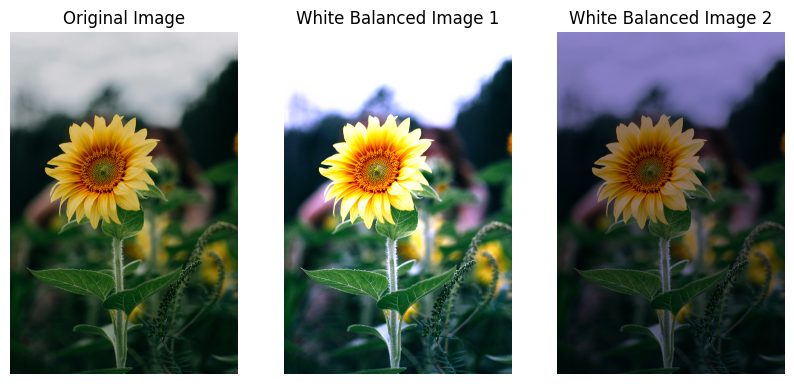

In [ ]:
def white_balance(image, sf=128):
    # Convert the image to float32
    img_float = image.astype(np.float32)

    # Calculate the average color of the image
    avg_color = np.mean(img_float, axis=(0, 1))
    print('average color', avg_color)

    # Calculate the scaling factors
    scale = sf / avg_color
    print('scaling factor', scale)

    # Apply the scaling factors to each channel
    img_balanced = img_float * scale
    print('max and min value', np.max(img_balanced), np.min(img_balanced))
    # Clip the values to be in the valid range [0, 255]
    img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_balanced

# Load an image
image_path = '/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg'
image = cv2.imread(image_path)

# print(image.shape) # (height, width, channels)

# Perform white balancing
balanced_image_1 = white_balance(image)

balanced_image_2 = white_balance(image, sf=50)

# Display the original and balanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(balanced_image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('White Balanced Image 1')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(balanced_image_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('White Balanced Image 2')

plt.show()

## Histogram

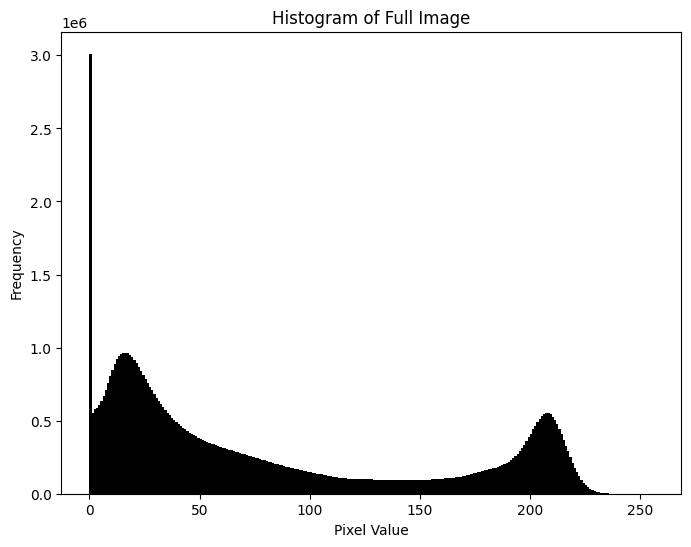

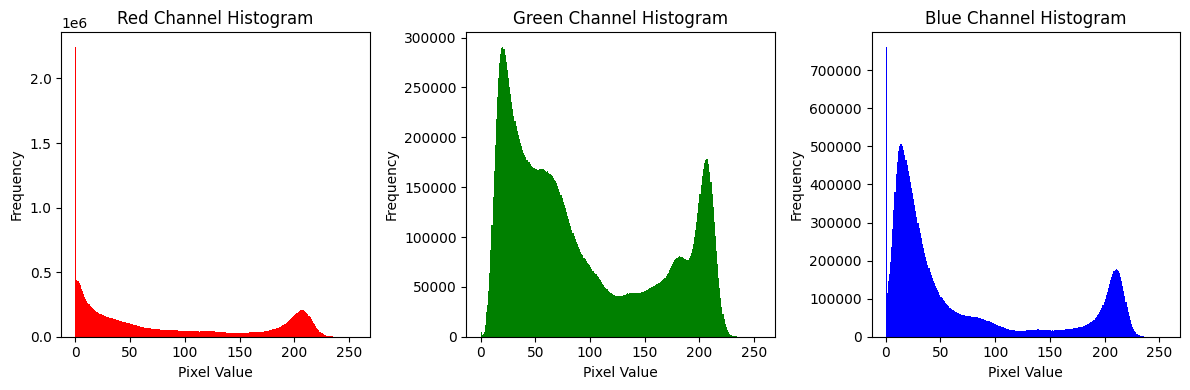

In [ ]:
from PIL import Image

image = Image.open('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg')

# Convert the image to a numpy array
img_array = np.array(image)

# Plot the histogram of the full image
plt.figure(figsize=(8, 6))
# flatten the image, plot histogram with black bars
plt.hist(img_array.ravel(), bins=256, range=(0, 256), color='k')
plt.title('Histogram of Full Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Plot the histograms of the individual color channels
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(img_array[:, :, 0].ravel(), bins=256, range=(0, 256), color='r')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(img_array[:, :, 1].ravel(), bins=256, range=(0, 256), color='g')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(img_array[:, :, 2].ravel(), bins=256, range=(0, 256), color='b')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram Equalization

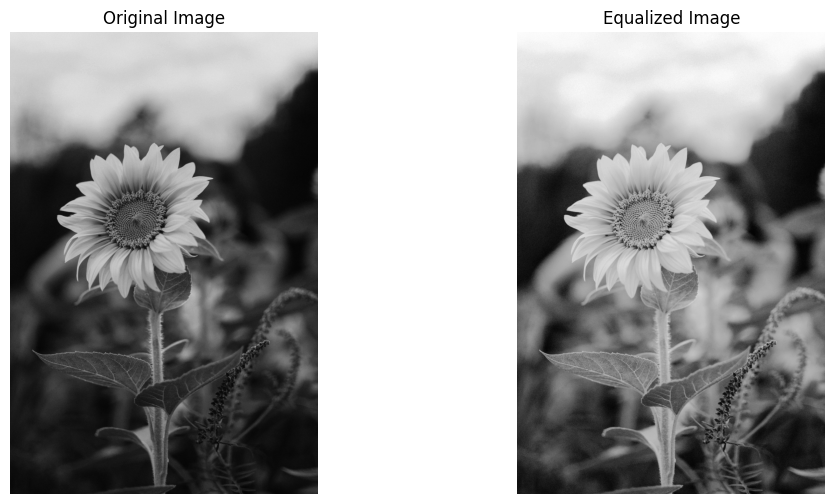

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

#### Adaptive Histogram Equalization CLAHE

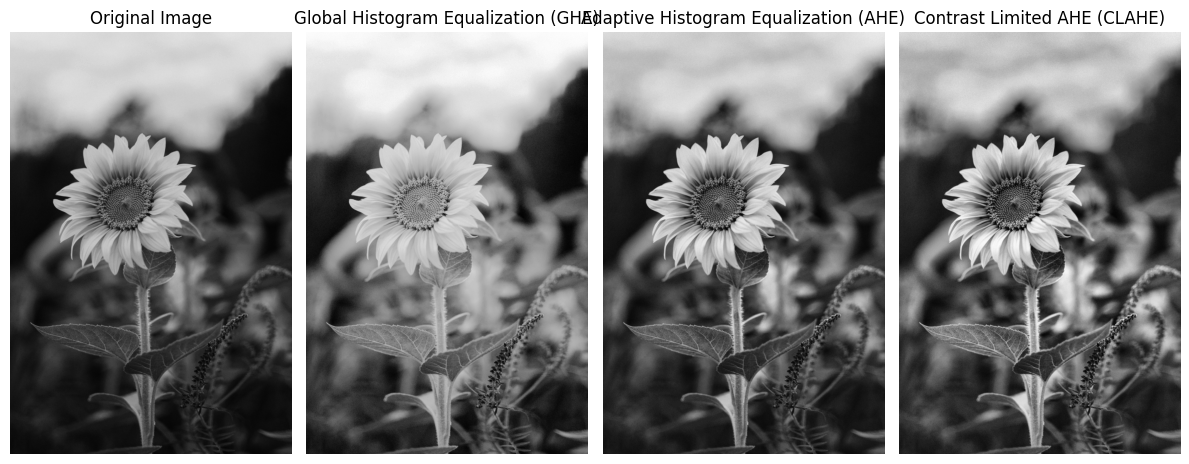

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Global Histogram Equalization (GHE)
ghe_image = cv2.equalizeHist(image)

# Apply Adaptive Histogram Equalization (AHE)
ahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
ahe_image = ahe.apply(image)

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Plotting the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(ghe_image, cmap='gray')
plt.title('Global Histogram Equalization (GHE)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title('Adaptive Histogram Equalization (AHE)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(clahe_image, cmap='gray')
plt.title('Contrast Limited AHE (CLAHE)')
plt.axis('off')

plt.tight_layout()
plt.show()


#### HE & CLAHE for color images

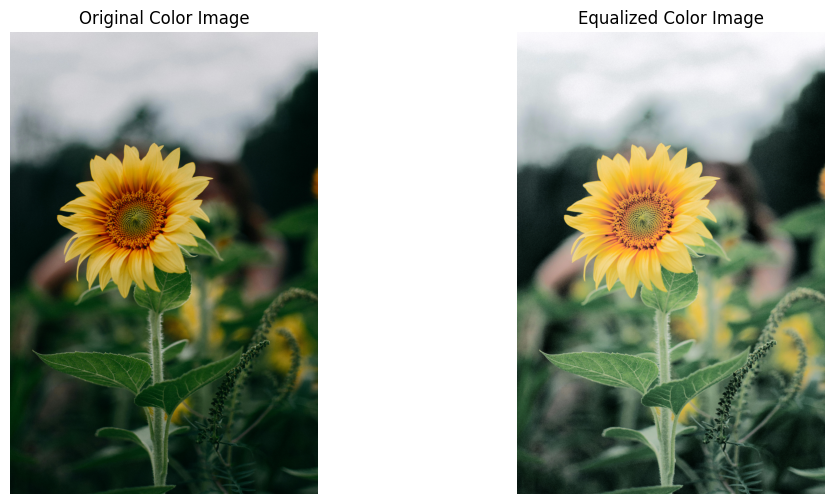

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg')

# Convert the image from BGR to YUV color space
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Equalize the Y channel (luminance)
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convert back to BGR color space
equalized_color_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Plotting the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Color Image')
plt.imshow(cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


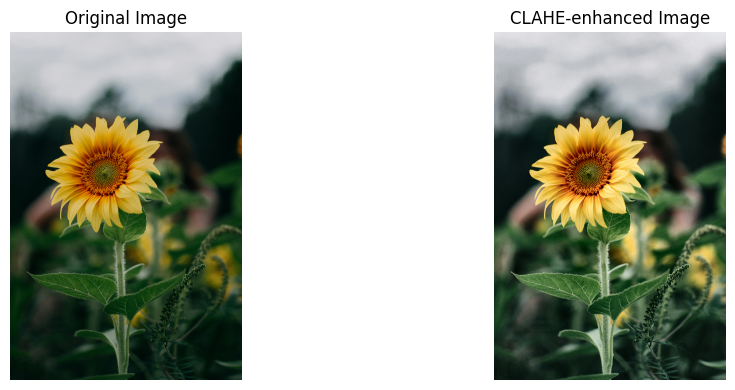

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pexels-maxandrey-1366630.jpg')

# Convert the image to the LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Apply CLAHE to the L (Lightness) channel
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(4, 4))
l_channel = lab_image[:, :, 0]
enhanced_l_channel = clahe.apply(l_channel)

# Merge the enhanced L channel with the original a and b channels
enhanced_lab_image = cv2.merge((enhanced_l_channel, lab_image[:, :, 1], lab_image[:, :, 2]))

# Convert the image back to the BGR color space
enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
ax2.set_title('CLAHE-enhanced Image')
ax2.axis('off')

plt.tight_layout()
plt.show()


## Morphological Transformation

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


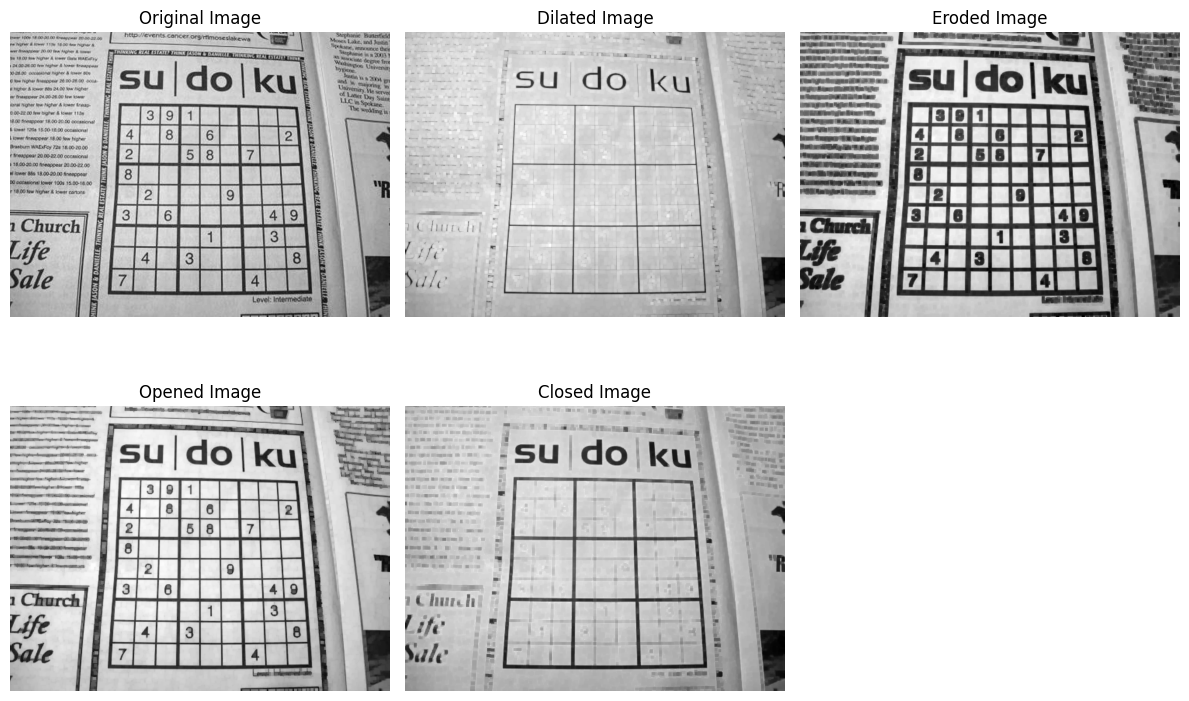

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/sudoku-1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)
print(kernel)

# Dilation
dilated = cv2.dilate(image, kernel, iterations=1)

#  Erosion
eroded = cv2.erode(image, kernel, iterations=1)

#  Opening
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#  Closing
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Opened Image')
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Closed Image')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


kernel: 
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


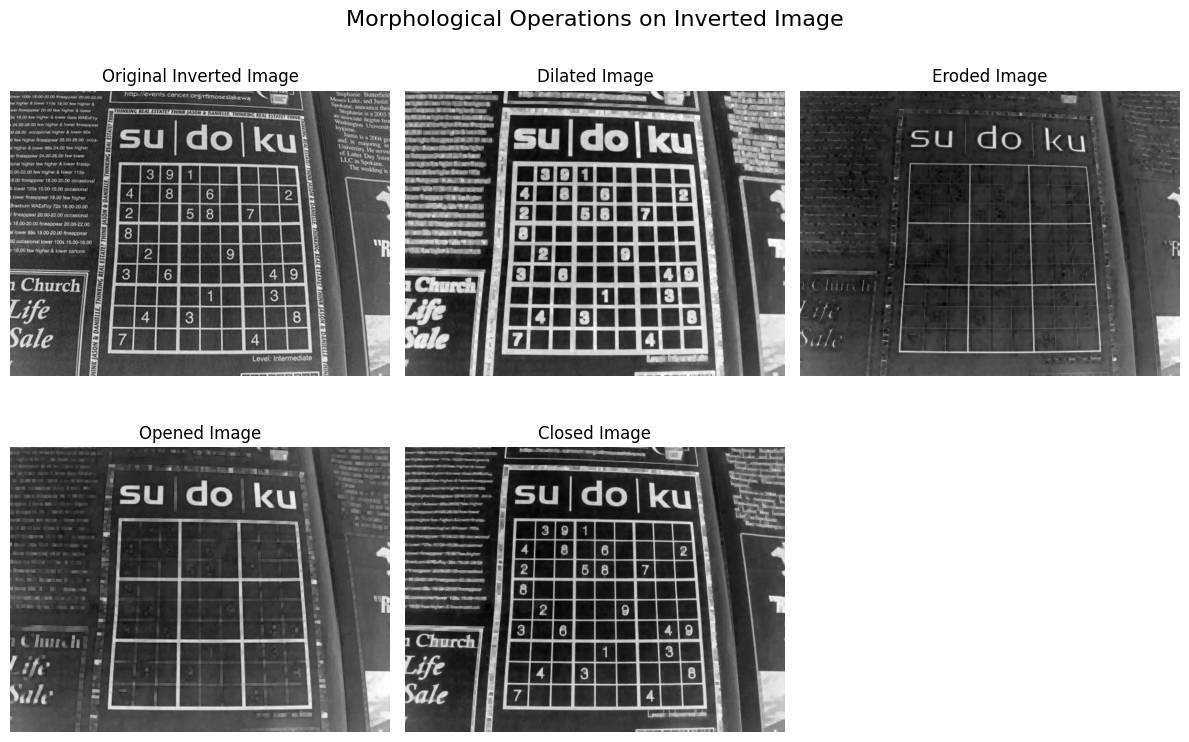

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/sudoku-1.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the image
image = cv2.bitwise_not(image)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)
print('kernel: ')
print(kernel)

# Dilation
dilated = cv2.dilate(image, kernel, iterations=1)

#  Erosion
eroded = cv2.erode(image, kernel, iterations=1)

#  Opening
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#  Closing
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))

# Add a common title
plt.suptitle('Morphological Operations on Inverted Image', fontsize=16)

plt.subplot(2, 3, 1)
plt.title('Original Inverted Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Opened Image')
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Closed Image')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()